Import useful modules:

In [1]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib import cm
import warnings
warnings.filterwarnings("ignore")

Define country codes using the ISO 3166-1 alpha-3 standard:

In [2]:
Europe_ia3 = {  
            'Albania':'ALB',
            'Austria':'AUT',
            'Bosnia_Herzegovina':'BIH', 
            'Belgium':'BEL',
            'Bulgaria':'BGR', 
            'Switzerland':'CHE', 
            'Czech_Republic':'CZE', 
            'Germany':'DEU', 
            'Denmark':'DNK', 
            'Estonia':'EST', 
            'Spain':'ESP', 
            'Finland':'FIN', 
            'France':'FRA', 
            'United_Kingdom':'GBR', 
            'Greece':'GRC', 
            'Croatia':'HRV', 
            'Hungary':'HUN', 
            'Ireland':'IRL', 
            'Italy':'ITA', 
            'Lithuania':'LTU', 
            'Luxembourg':'LUX', 
            'Latvia':'LVA', 
            'Montenegro':'MNE', 
            'Macedonia':'MKD', 
            'Netherlands':'NLD', 
            'Norway':'NOR', 
            'Poland':'POL', 
            'Portugal':'PRT', 
            'Romania':'ROU', 
            'Serbia':'SRB', 
            'Sweden':'SWE', 
            'Slovenia':'SVN', 
            'Slovakia':'SVK'
            }

Use basemap to initialize a map. Define geographical domain, map projection, resolution, and coordinate of the center.

In [3]:
fig, ax = plt.subplots(1,1,figsize=(10,20))
m_plot = Basemap(width=11500000/2.9,height=9000000/2.2,projection='laea',
                  resolution='i',lat_0=54.5,lon_0=9.5,ax=ax)
plt.close(fig)

Here is the data that you want to visualize in the map. As an example, we allocate the value '50' to all countries:

In [4]:
data_example = [50]*len(Europe_ia3.keys())
df = pd.DataFrame(index=Europe_ia3.keys(),
                 data=data_example,columns=['data'])

In [5]:
df.head()

,data
Albania,50
Austria,50
Bosnia_Herzegovina,50
Belgium,50
Bulgaria,50


To examplify how the data does not have to be uniform, we allocate other values to a few of the countries:

In [6]:
df.loc[['Denmark','Norway','Sweden']] = 70

Choose colormap and datarange for color bar:

In [7]:
cmap = cm.get_cmap('Blues', 12)
norm=plt.Normalize(0,100)

Plot data:

In [8]:
for c in Europe_ia3.keys():
    m_plot.readshapefile('shapefiles/gadm36_' + Europe_ia3[c] + '_0',c,drawbounds=True,linewidth = 0,color='k')
    patches = []
    value = df.loc[c].item()
    for info, shape in zip(eval('m_plot.' + c + '_info'), eval('m_plot.' + c)):
        patches.append(Polygon(np.array(shape), True))
    patch1=ax.add_collection(PatchCollection(patches, facecolor= cmap(norm(value))))

Add color bar:

In [9]:
cb_ax = fig.add_axes([0.95,0.295,0.02,0.21])
cb1 = mpl.colorbar.ColorbarBase(cb_ax,
                                orientation='vertical', 
                                cmap=cmap,norm=norm,
                                boundaries=np.arange(0,100)
                               )

cb1.set_label('Data',zorder=10,fontsize=15)
cb1.ax.tick_params(labelsize=15)

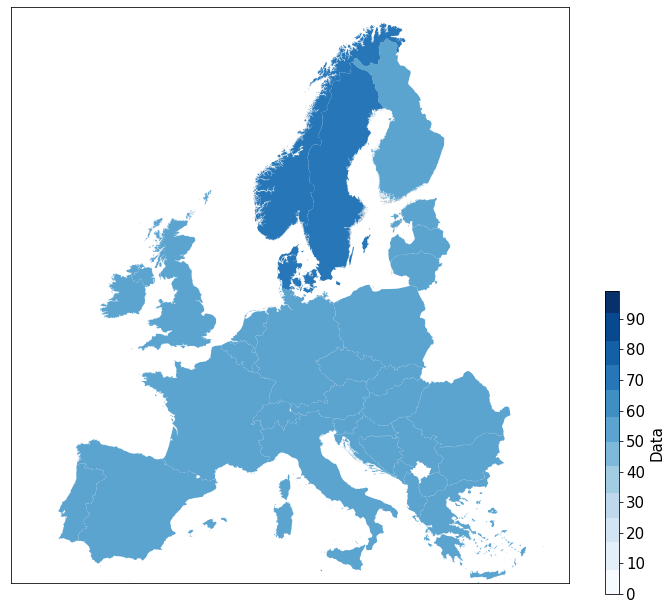

In [10]:
fig

In [11]:
fig.savefig('national_colors.png',dpi=300,bbox_inches='tight')  